Part 2: Qualitative Analysis
Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

* **What's the ideal pledge goal?**

In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from tools.helpers import read_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]

In [49]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [60]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

df = df.rename(columns=lambda x: x.replace(' ', '_'))
df['uid'] = df.index + 1

In [61]:
df.head(5)

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration,uid
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,1
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,2
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,3
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,4
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,5


In [71]:
# filter outliers
from scipy import stats

dfs = df[['uid', 'funded_percentage', 'goal']]

dff = dfs[(np.abs(stats.zscore(dfs)) < 3).all(axis=1)]

dfm = dff.merge(df.drop(['funded_percentage', 'goal'], axis=1), how='left', on='uid')

dfs = dfm[(dfm.status == 'successful')]
dfu = dfm[(dfm.status != 'successful') & (dfm.status != 'live')]

dfk = df[(df.status != 'live')].copy()

dfm['Final Status'] = np.where(dfm['status']=='successful', 'successful', 'unsuccessful')


In [63]:
dfs.goal.describe()

count     22943.000000
mean       5450.794183
std       10868.848403
min           1.000000
25%        1300.000000
50%        3000.000000
75%        6000.000000
max      500000.000000
Name: goal, dtype: float64

In [64]:
dfu.goal.describe().apply(lambda x: format(x, 'f'))

count     19041.000000
mean      13260.633631
std       30411.315493
min           0.500000
25%        2500.000000
50%        5000.000000
75%       12000.000000
max      575000.000000
Name: goal, dtype: object

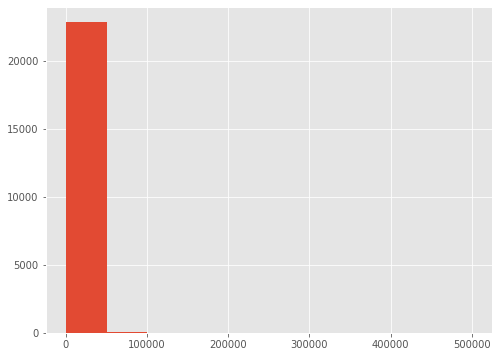

In [65]:
dfs.goal.hist(bins=10)

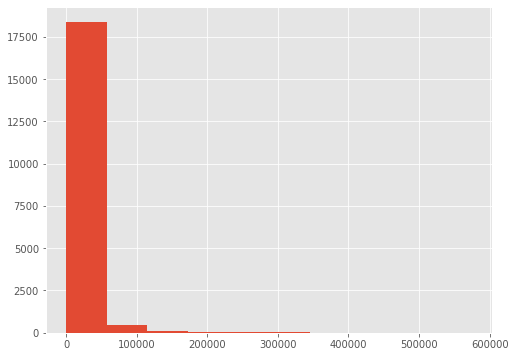

In [66]:
dfu.goal.hist(bins=10)

In [67]:
df

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration,uid
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,1
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,2
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,3
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,4
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83,45953
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96,45954
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32,45955
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00,45956


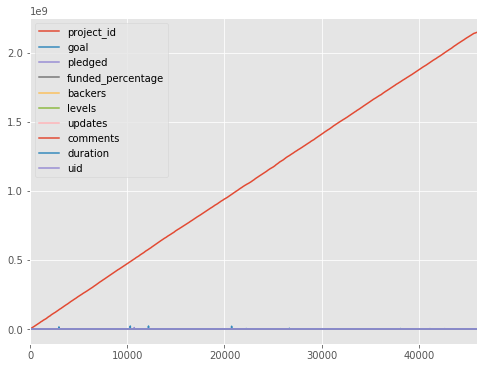

In [68]:
df.plot()

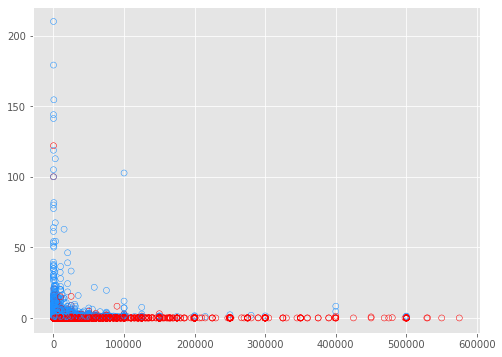

In [75]:
colors = {'failed': 'red', 'unsuccessful': 'red','live': 'grey', 'canceled': 'orange', 'suspended': 'yellow', 'successful': 'dodgerblue'}
plt.scatter(dfm.goal, dfm.funded_percentage, facecolors='none', edgecolors=dfm['Final Status'].apply(lambda x: colors[x]))  # s=dfm.funded_percentage, 

(array([4.489e+04, 6.620e+02, 1.560e+02, 7.000e+01, 5.600e+01, 2.700e+01,
        2.000e+01, 3.000e+00, 2.100e+01, 4.000e+00]),
 array([5.0000000e-01, 5.7500450e+04, 1.1500040e+05, 1.7250035e+05,
        2.3000030e+05, 2.8750025e+05, 3.4500020e+05, 4.0250015e+05,
        4.6000010e+05, 5.1750005e+05, 5.7500000e+05]),
 <a list of 10 Patch objects>)

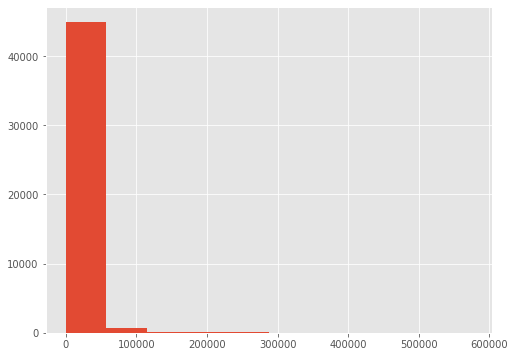

In [77]:
plt.hist(dfm.goal)

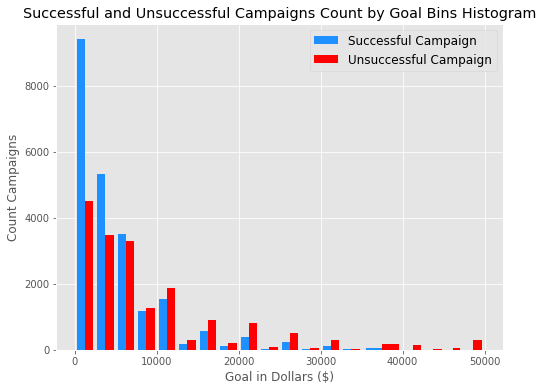

In [95]:
dfs = dfm[(dfm.status == 'successful')]
dfu = dfm[(dfm.status != 'successful') & (dfm.status != 'live')]
dfms = dfm[(dfm.status == 'successful')]
dfmu = dfm[(dfm.status != 'successful') & (dfm.status != 'live')]

dfms = dfms[['uid', 'goal']]
dfmu = dfmu[['uid', 'goal']]

dfms = dfms[(np.abs(stats.zscore(dfms)) < 3).all(axis=1)]
dfmu = dfmu[(np.abs(stats.zscore(dfmu)) < 3).all(axis=1)]


x1 = list(dfms.goal)
x2 = list(dfmu.goal)


# Assign colors for each airline and the names
colors = ['dodgerblue', 'red'] #, '#F0E442', '#009E73', '#D55E00']

# Plot formatting
plt.xlabel('Goal in Dollars ($)')
plt.ylabel('Count Campaigns')
plt.title('Successful and Unsuccessful Campaigns Count by Goal Bins Histogram')


plt.hist(
    [x1, x2], 
    bins=[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 40000, 42500, 45000, 47250, 50000,],
    # bins=30,
    density=False,
    color = colors,
    # labels=['masdfadsfds', 'sasdfdass'],
    
)
plt.legend(labels=['Successful Campaign', 'Unsuccessful Campaign'], fontsize=12)
# plt.axvline(x=50, color='black', linestyle='--', linewidth=5)
# plt.text(
#     52, 5000, 
#     'Suggested Day Limit', 
#     horizontalalignment='left',
#     verticalalignment='center',
#     fontsize=15
# )

# plt.xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000])